In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/minhhieu/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(database="VN30_Stocks", user="postgres", password="123", host="localhost", port="5432")
cur = conn.cursor()

In [3]:
query = """
    select *
    from data_fact
    order by date desc
    limit 30
"""
df = pd.read_sql_query(query, conn)

In [4]:
df

,symbol,date,close,volume,ma10,ma20,ma50,price_change_in_day,price_change_in_week,price_change_in_month,price_change_in_6month,price_change_in_year
0,VCB,2022-10-26,70000.0,59140.0,67781.8,68814.3,75468.6,0.14,3.09,-7.77,-13.04,-3.81
1,VRE,2022-10-26,22200.0,66720.0,24322.7,25283.3,27194.1,-3.48,-11.90,-22.11,-28.50,-27.45
2,POW,2022-10-26,10000.0,482230.0,10568.2,11071.4,12711.8,0.30,-9.09,-25.37,-23.08,-19.03
3,BID,2022-10-26,31700.0,68400.0,32136.4,31783.3,35220.6,1.28,-3.94,-8.78,-14.09,2.18
4,VPB,2022-10-26,15550.0,706040.0,15809.1,16273.8,18617.8,0.65,-2.51,-18.87,-35.92,-37.04
5,ACB,2022-10-26,20650.0,216910.0,20477.3,20461.9,22546.1,1.23,-2.13,-8.63,-16.46,-18.31
6,GVR,2022-10-26,13500.0,129310.0,15500.0,17023.8,21501.0,1.50,-18.43,-42.18,-54.24,-64.75
7,VHM,2022-10-26,43500.0,370030.0,48895.4,50402.4,55844.1,-2.47,-13.00,-23.95,-31.12,-43.11
8,HPG,2022-10-26,16900.0,1124370.0,18140.9,18735.7,21476.5,-1.17,-8.15,-25.55,-45.80,-60.34
9,STB,2022-10-26,15000.0,762480.0,16659.1,17554.8,21209.8,0.67,-13.29,-30.07,-45.26,-41.41


In [5]:
def insert_color(price:int):
    if price < 0:
        return "red"
    else:
        return "green"

# Evaluate the change of price in 1 day


In [6]:
price_change_in_day_df = df[["symbol", "price_change_in_day"]]
price_change_in_day_df = price_change_in_day_df.sort_values(by=["price_change_in_day"])
price_change_in_day_df = price_change_in_day_df.reset_index()
price_change_in_day_df["color"] = price_change_in_day_df["price_change_in_day"].map(insert_color)


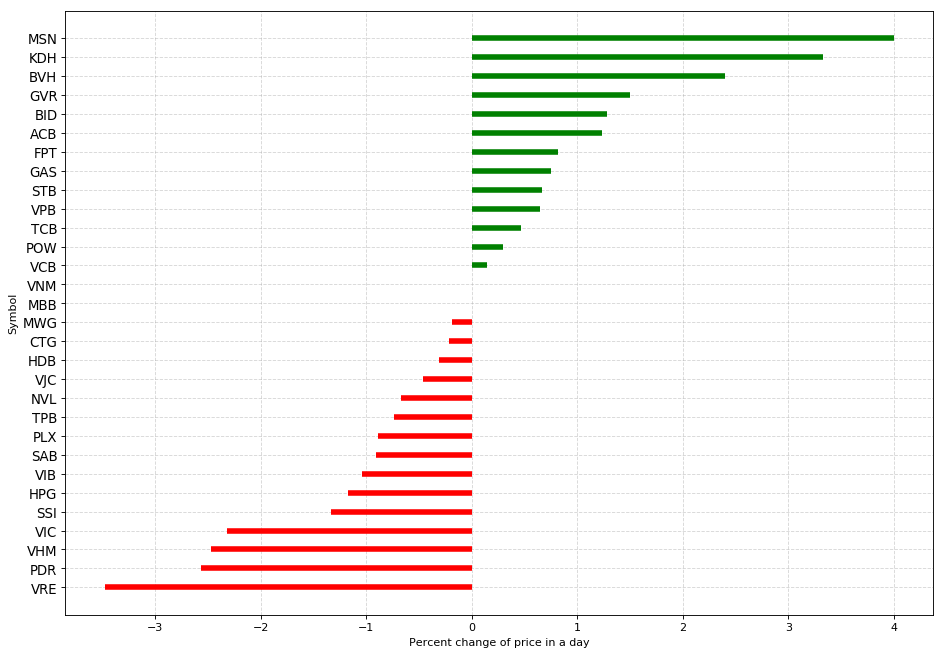

In [7]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_day_df.index, xmin=0, xmax=price_change_in_day_df.price_change_in_day,color=price_change_in_day_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in a day")
plt.yticks(price_change_in_day_df.index, price_change_in_day_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 week

In [8]:
price_change_in_week_df = df[["symbol", "price_change_in_week"]]
price_change_in_week_df = price_change_in_week_df.sort_values(by=["price_change_in_week"])
price_change_in_week_df = price_change_in_week_df.reset_index()
price_change_in_week_df["color"] = price_change_in_week_df["price_change_in_week"].map(insert_color)


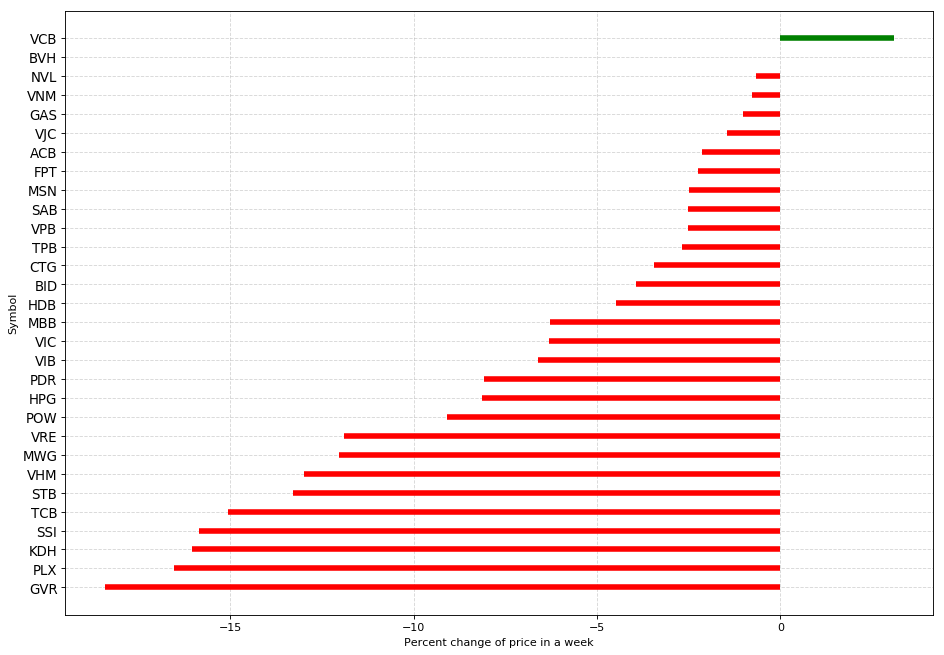

In [9]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_week_df.index, xmin=0, xmax=price_change_in_week_df.price_change_in_week,color=price_change_in_week_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in a week")
plt.yticks(price_change_in_week_df.index, price_change_in_week_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 month

In [10]:
price_change_in_month_df = df[["symbol", "price_change_in_month"]]
price_change_in_month_df = price_change_in_month_df.sort_values(by=["price_change_in_month"])
price_change_in_month_df = price_change_in_month_df.reset_index()
price_change_in_month_df["color"] = price_change_in_month_df["price_change_in_month"].map(insert_color)

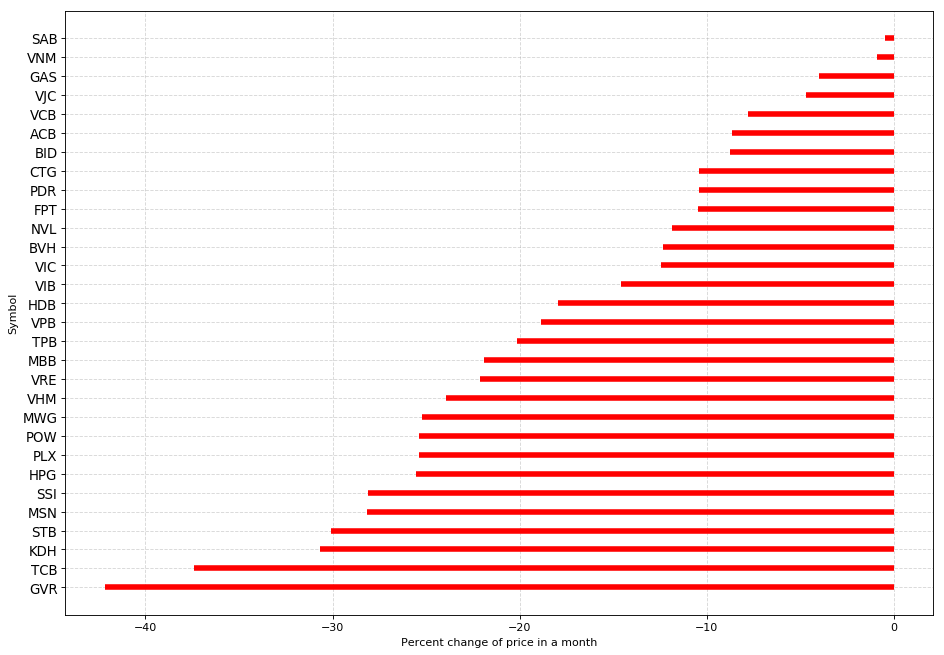

In [11]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_month_df.index, xmin=0, xmax=price_change_in_month_df.price_change_in_month,color=price_change_in_month_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in a month")
plt.yticks(price_change_in_month_df.index, price_change_in_month_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the change of price in 1 year

In [12]:
price_change_in_year_df = df[["symbol", "price_change_in_year"]]
price_change_in_year_df = price_change_in_year_df.sort_values(by=["price_change_in_year"])
price_change_in_year_df = price_change_in_year_df.reset_index()
price_change_in_year_df["color"] = price_change_in_year_df["price_change_in_year"].map(insert_color)

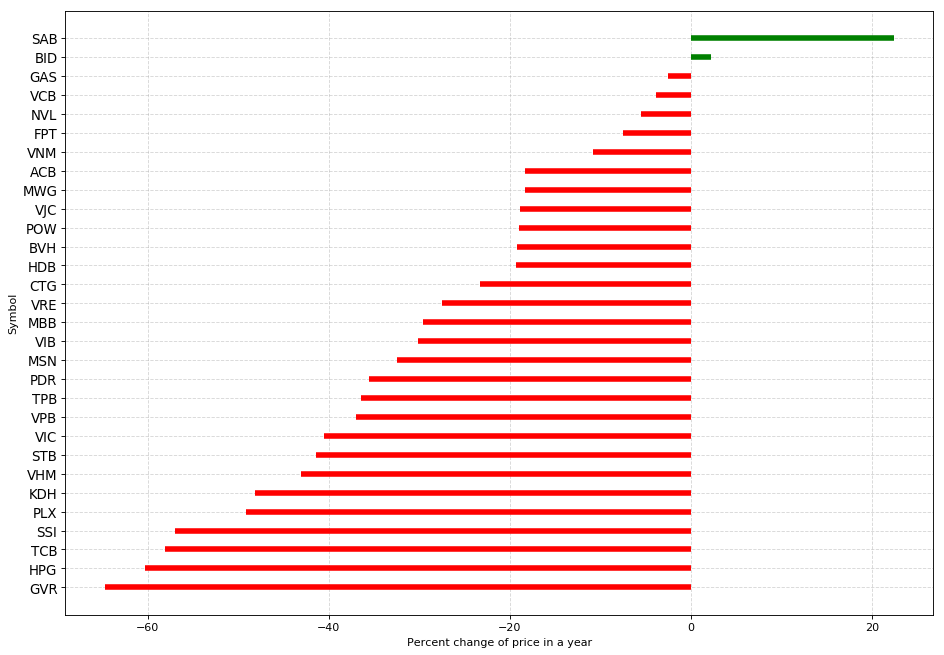

In [13]:
plt.figure(figsize=(14,10), dpi=80)
plt.hlines(y=price_change_in_year_df.index, xmin=0, xmax=price_change_in_year_df.price_change_in_year,color=price_change_in_year_df.color, linewidth=5)
plt.gca().set(ylabel="Symbol", xlabel="Percent change of price in a year")
plt.yticks(price_change_in_year_df.index, price_change_in_year_df.symbol, fontsize=12)
plt.grid(linestyle="--", alpha=0.5)

plt.show()

# Evaluate the trending

In [14]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{round(pct,2)}%\n({absolute})"

In [15]:
MA10_df = [df[df["close"] < df["ma10"]].shape[0], df[df["close"] >= df["ma10"]].shape[0]]
Labels = 'Smaller', 'Greater'

In [16]:
MA20_df = [df[df["close"] < df["ma20"]].shape[0], df[df["close"] >= df["ma20"]].shape[0]]

In [17]:
MA50_df = [df[df["close"] < df["ma50"]].shape[0], df[df["close"] >= df["ma50"]].shape[0]]

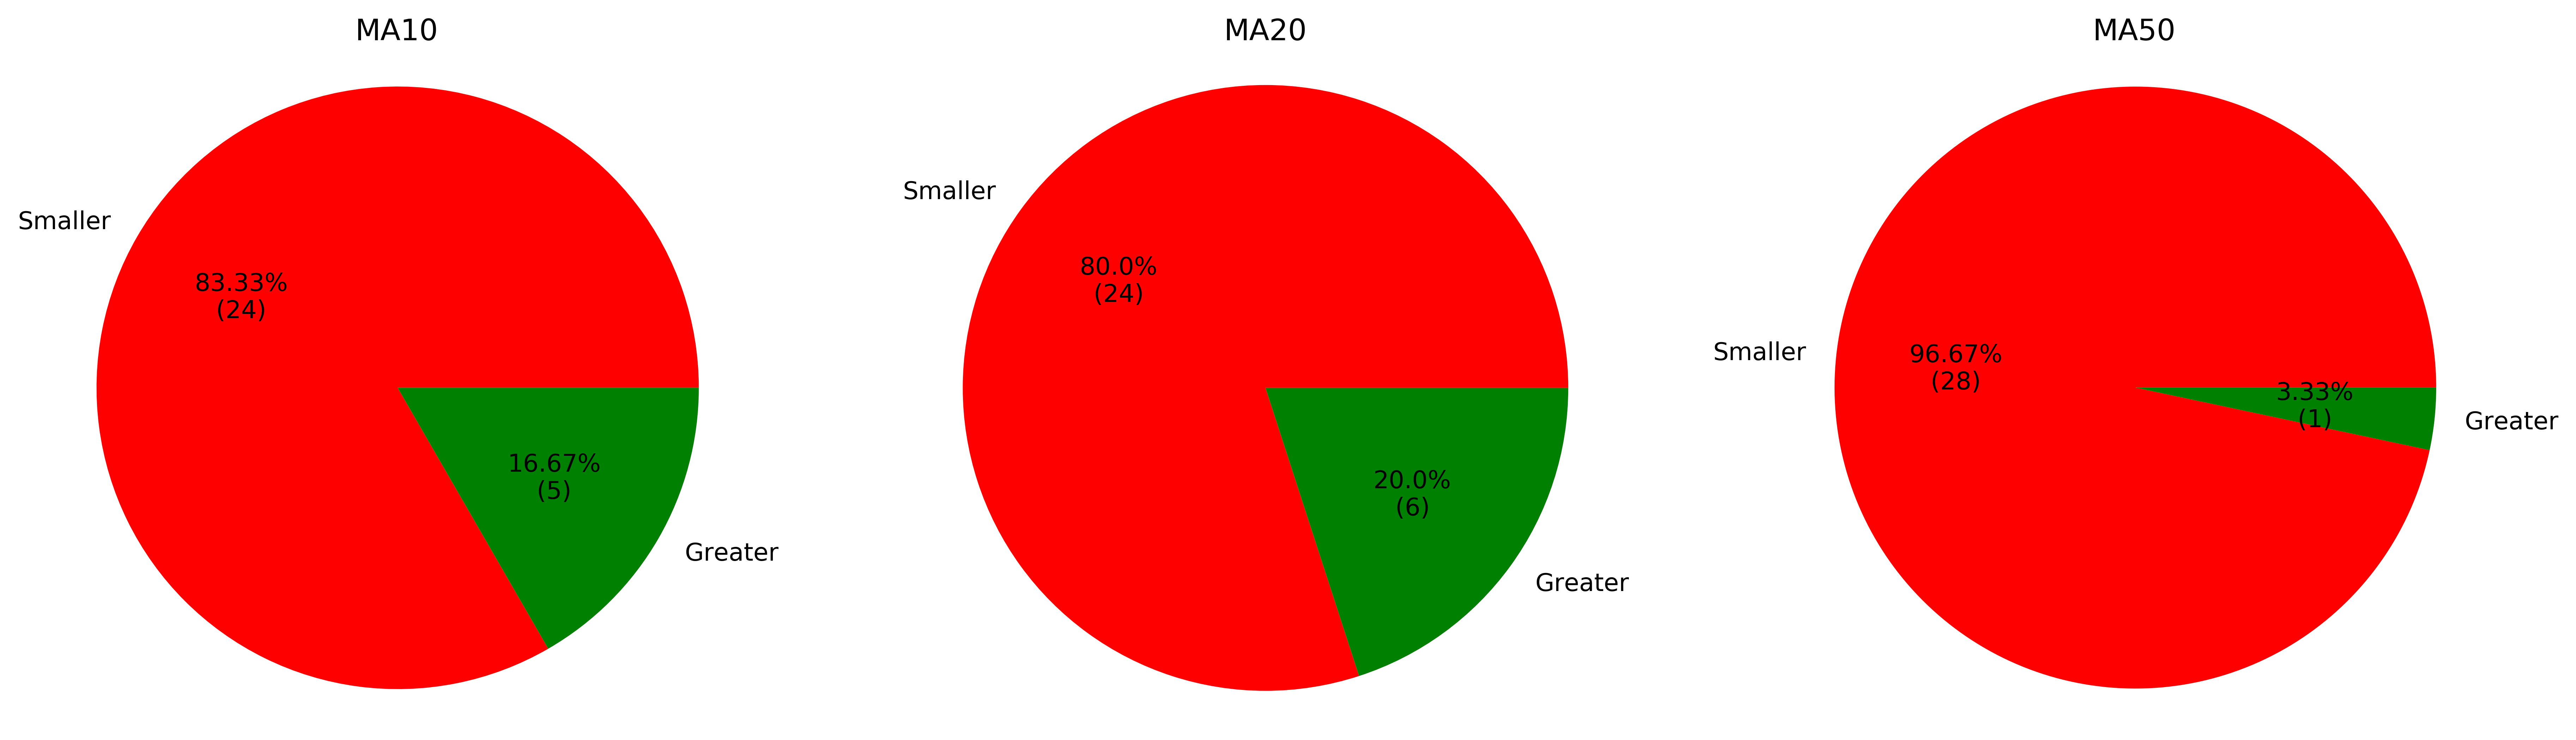

In [30]:
fig = plt.figure(figsize=(18,5), dpi=500)

ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(MA10_df, labels=Labels, autopct=lambda pct: func(pct, MA10_df), colors=["red", "green"])
plt.axis("equal")
plt.title("MA10")

ax2 = plt.subplot2grid((1,3),(0,1))
plt.pie(MA20_df, labels=Labels, autopct=lambda pct: func(pct, MA20_df), colors=["red", "green"])
plt.axis("equal")
plt.title("MA20")

ax3 = plt.subplot2grid((1,3),(0,2))
plt.pie(MA50_df, labels=Labels, autopct=lambda pct: func(pct, MA50_df), colors=["red", "green"])
plt.axis("equal")
plt.title("MA50")

plt.show()
